In [6]:
# This will force external files to be reloaded
%load_ext autoreload
%autoreload 2
import utils.rootprint
import utils.rootnotes
from array import array

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors
import math
from itertools import chain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# input_file_name = "/Users/demattia/RemoteProjects/Test/linearFitterHistograms.root"

input_file_name = "/Users/demattia/RemoteProjects/Test/PreTransverse/linearFitterHistograms.root"

# input_file_name = "/Users/demattia/RemoteProjects/Test/fullLinearFitterHistograms.root"

In [12]:
from utils.plotting import *

## Pt Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


bin_edges = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221]


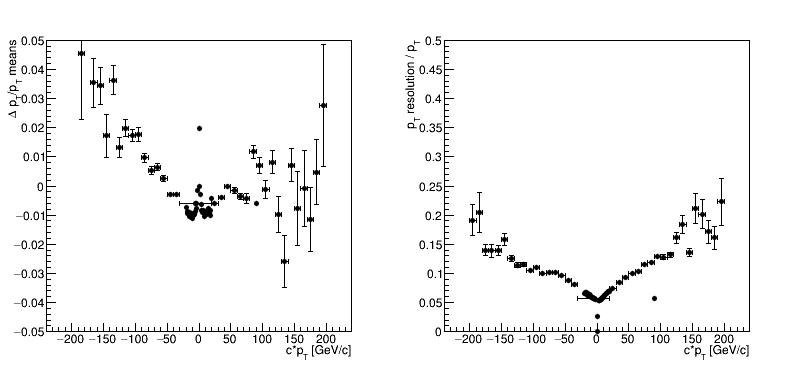

In [22]:
total_bins = 400
pt_bin_edge = []
min_x = -0.05
max_x = 0.05
# pt_min = -10.
# pt_max = 10.
# pt_bin_edge = [n for n in chain(range(-10, -1), range(2, 11))]

# Full pt range
pt_min = -200.
pt_max = 200.
# pt_bin_edge = [n for n in chain(range(-200, -1), range(2, 201))]
pt_bin_edge = [10*n for n in chain(range(-20, -2), range(2, 21))]+[n for n in chain(range(-20, -1), range(2, 21))]

o = fit_slices(input_file_name, "deltaPtOverPtVsPt", pt_bin_edge, pt_min, pt_max, total_bins, min_x, max_x, 0., 0.5,
               "c*p_{T} [GeV/c]", "#Delta p_{T}/p_{T}", "p_{T} resolution / p_{T}")
o[2]

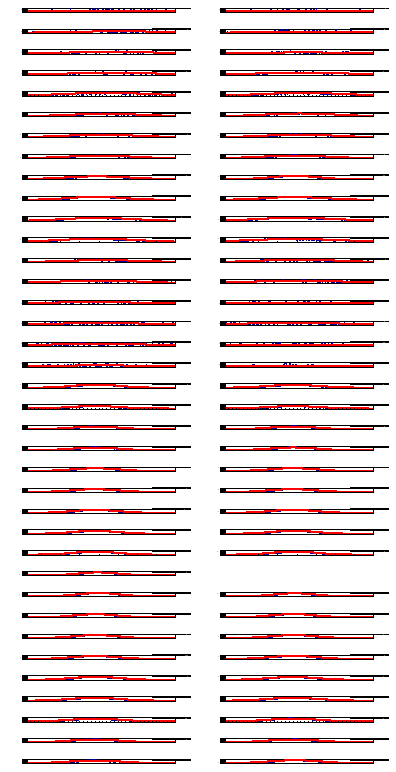

In [23]:
o[1]

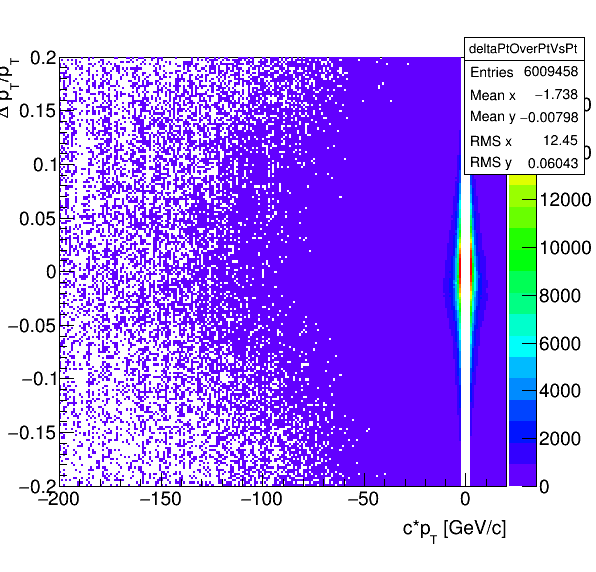

In [24]:
o[0]

## 1/Pt Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2


bin_edges = [117, 118, 119, 119, 121, 122, 123]


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


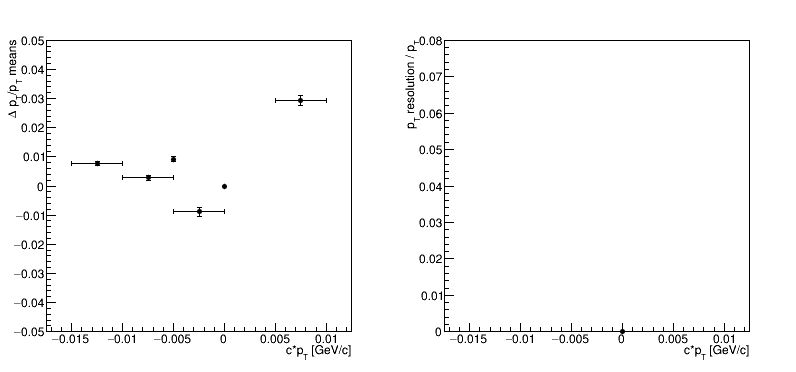

In [30]:
curvature_bin_edge = [n/200. for n in chain(range(-3, 0), range(-1, 3))]

oc = fit_slices(input_file_name, "deltaCurvatureOverCurvatureVsCurvature", curvature_bin_edge, -0.6, 0.6, 240, min_x, max_x, 0., 0.08,
               "c*p_{T} [GeV/c]", "#Delta p_{T}/p_{T}", "p_{T} resolution / p_{T}")

oc[2]

In [31]:
# oc[1]

In [32]:
# oc[0]

## Phi Bias and Resolution

In [33]:
min_x_phi = -0.001
max_x_phi = 0.001
# min_x_phi = -0.01
# max_x_phi = 0.01
ophi = fit_slices(input_file_name, "deltaPhiVsPt", pt_bin_edge, pt_min, pt_max, total_bins,
                   min_x_phi, max_x_phi, 0., 0.002,
#                   10*min_x_phi, 10*max_x_phi, 0., 0.01,
                  "c*p_{T} [GeV/c]", "#Delta#phi", "#Delta#phi sigmas")
ophi[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

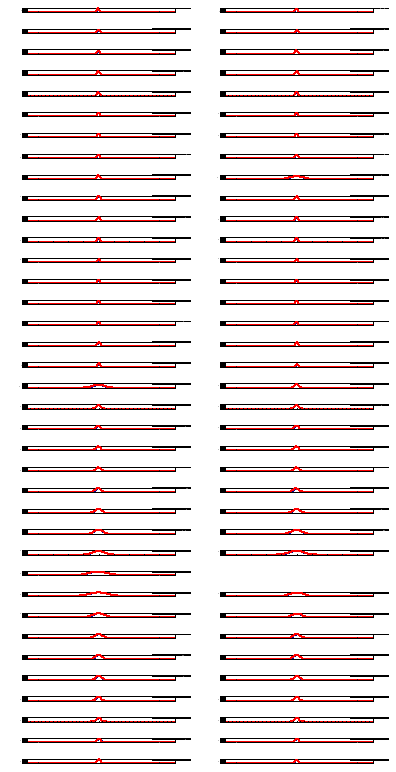

In [1092]:
ophi[1]

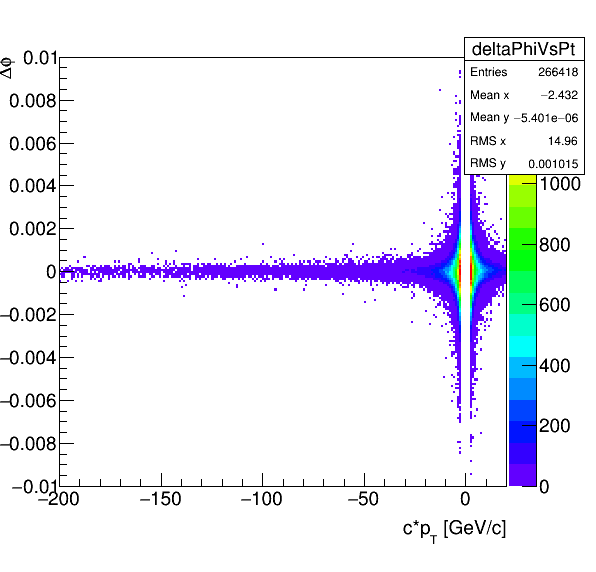

In [1093]:
ophi[0]

## $\chi^2/ndof$

<ROOT.TH1F object ("normChi2_summary") at 0x7ffe1ca4cb80>


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof


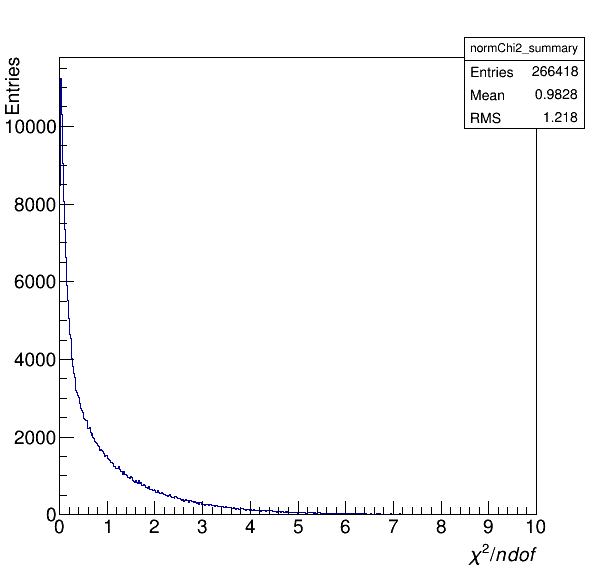

In [1094]:
c_chi2Ndof = draw_chi2ndof(input_file_name)
c_chi2Ndof[0]

##Z Bias and Resolution

In [1095]:
z0_min = -20.
z0_max = 20.
total_bins_z0 = 400
min_x_z0 = -0.5
max_x_z0 = 0.5
z0_bin_edge = [n for n in range(int(z0_min), int(z0_max)+1)]

o_z0 = fit_slices(input_file_name, "deltaZ0VsZ0", z0_bin_edge, z0_min, z0_max, total_bins_z0,
                  min_x_z0, max_x_z0, 0., 1.,
                  # min_x_z0, max_x_z0, 0., 10.,
                  "z_{0} [cm]", "#Deltaz_{0} [cm]", "z_{0} resolution [cm]")

o_z0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [1096]:
o_z0[1]

None

In [1097]:
o_z0[0]

None

In [1098]:
eta_min = -2.5
# eta_min = 1.5
eta_max = 2.5
total_bins_eta = 500
min_x_z0 = -1.
max_x_z0 = 1.
# eta_bin_edge = [n/10. for n in range(int(eta_min*10), int(eta_max*10)+1)]
eta_bin_edge = [n/10. for n in range(int(eta_min*10), int(eta_max*10)+1)]
# eta_bin_edge = [n/100. for n in range(1, int(eta_max*100)+1)]

o_z0 = fit_slices(input_file_name, "deltaZ0VsEta", eta_bin_edge, eta_min, eta_max, total_bins_eta,
                  min_x_z0, max_x_z0, 0., 0.55,
                  # 10*min_x_z0, 10*max_x_z0, 0., 10.,
                  "#eta", "#Deltaz_{0} [cm]", "z_{0} resolution [cm]")

o_z0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [1099]:
o_z0[1]

None

In [1100]:
o_z0[0]

None

##$cot\theta$ bias and resolution

In [1101]:
min_x_eta = -0.02
max_x_eta = 0.02

o_cotTheta = fit_slices(input_file_name, "deltaCotThetaVsEta", eta_bin_edge,
                        eta_min, eta_max, total_bins_eta, min_x_eta, max_x_eta, 0., 0.05,
                        # eta_min, eta_max, total_bins_eta, min_x_eta, max_x_eta, 0., 0.1,
                        "#eta", "#Deltacot#theta", "cot#theta resolution")

o_cotTheta[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [1102]:
o_cotTheta[0]

None

In [1103]:
min_x_eta = -0.02
max_x_eta = 0.02

o_cotTheta = fit_slices(input_file_name, "deltaEtaVsEta", eta_bin_edge,
                        eta_min, eta_max, 400, min_x_eta, max_x_eta, 0., 0.005,
                        # eta_min, eta_max, 400, min_x_eta, max_x_eta, 0., 0.05,
                        "#eta", "#Delta#eta", "#eta resolution")

o_cotTheta[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [1104]:
o_cotTheta[0]

None

##$\cot\theta$ Bias and Resolution vs $z0$

In [1105]:
o_cotThetaVsZ0 = fit_slices(input_file_name, "deltaCotThetaVsZ0", z0_bin_edge, z0_min, z0_max, total_bins_z0,
                            min_x_eta, max_x_eta, 0., 0.03,
                            "z_{0} [cm]", "#Deltacot#theta", "cot#theta resolution [cm]")

o_cotThetaVsZ0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [1106]:
o_cotThetaVsZ0[1]

None

In [1107]:
o_cotThetaVsZ0[0]

None

##Other biases and resolutions

###z bias and resolution vs $p_{T}$ 

In [1108]:
ophi = fit_slices(input_file_name, "deltaZ0VsPt", pt_bin_edge, pt_min, pt_max, total_bins,
                  # 10*min_x_z0, 10*max_x_z0, 0., 2.,
                  min_x_z0, max_x_z0, 0., 2.,
                  "c*p_{T} [GeV/c]", "#Deltaz_{0} [cm]", "z_{0} resolution [cm]")
ophi[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

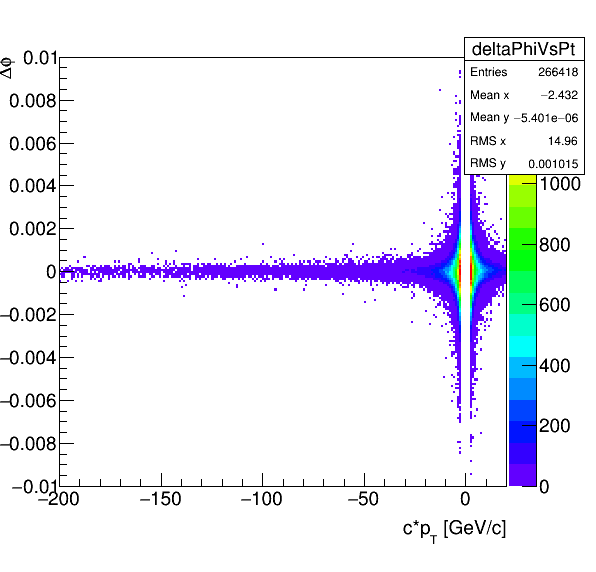

In [1109]:
ophi[0]

###cot($\theta$) bias and resolution vs $p_{T}$

In [1110]:
ophi = fit_slices(input_file_name, "deltaCotThetaVsPt", pt_bin_edge, pt_min, pt_max, total_bins,
                  min_x_eta, max_x_eta, 0., 0.05,
                  "c*p_{T} [GeV/c]", "#Deltacot(#theta) [cm]", "cot(#theta) resolution [cm]")
ophi[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

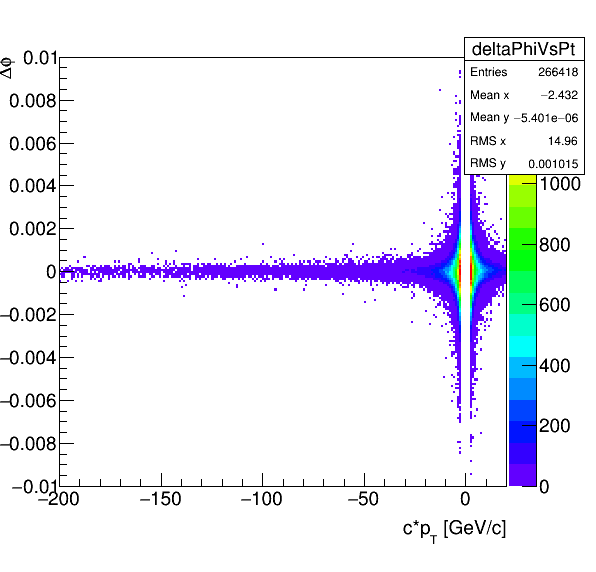

In [1111]:
ophi[0]

### $p_{T}$ relative bias and resolution vs $\eta$

bin_edges = [1, 11, 21, 30, 40, 51, 61, 71, 81, 90, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 230, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 410, 421, 431, 441, 451, 460, 471, 481, 491, 501]


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


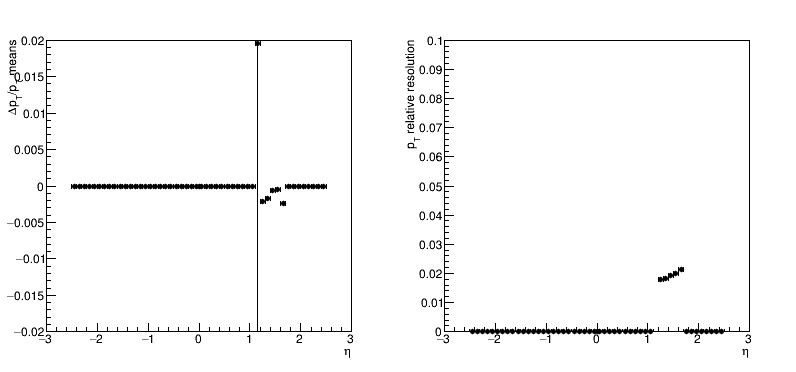

In [1112]:
# Note: the bins should be changed from 100 to 400 at some point.
ophi = fit_slices(input_file_name, "deltaPtOverPtVsEta", eta_bin_edge, eta_min, eta_max, 500,
#                  min_x, max_x, 0., 0.01,
                  min_x, max_x, 0., 0.1,
                  "#eta", "#Deltap_{T}/p_{T}", "p_{T} relative resolution")
ophi[2]

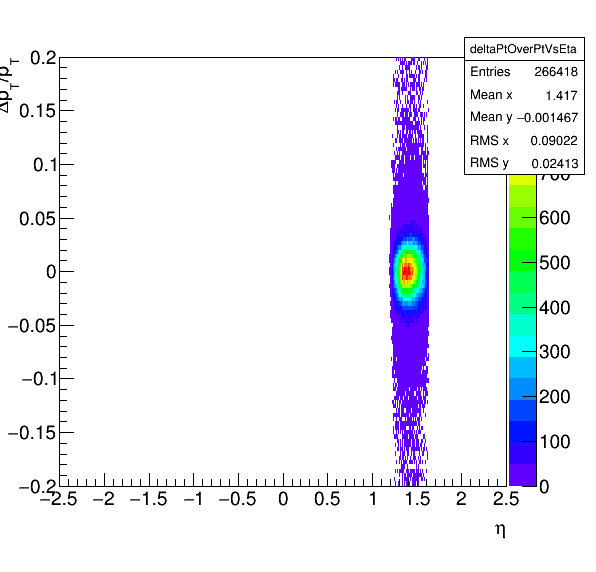

In [1113]:
ophi[0]

In [1114]:
# ophi[1]

### $\phi$ bias and resolution vs $\eta$

bin_edges = [1, 11, 21, 30, 40, 51, 61, 71, 81, 90, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 230, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 410, 421, 431, 441, 451, 460, 471, 481, 491, 501]


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


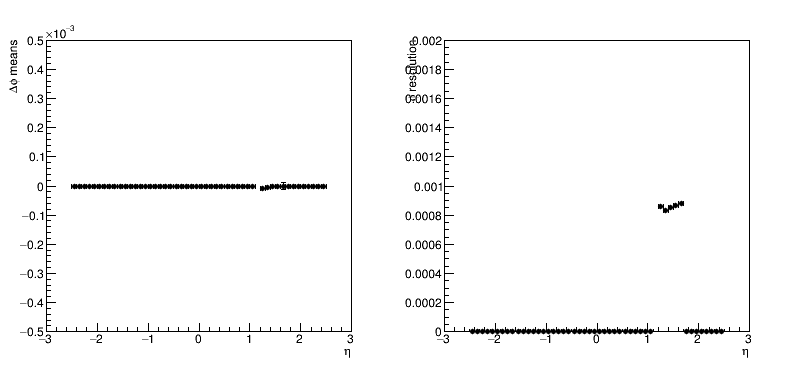

In [1115]:
ophi = fit_slices(input_file_name, "deltaPhiVsEta", eta_bin_edge, eta_min, eta_max, 500, 0.5*min_x_phi, 0.5*max_x_phi,
                  0., 0.002,
                  "#eta", "#Delta#phi", "#phi resolution")
ophi[2]

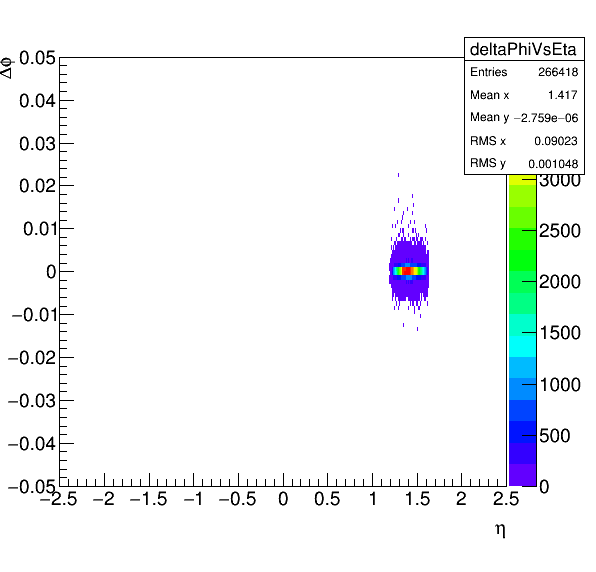

In [1116]:
ophi[0]

##$d_{0}$ bias and resolution

In [1117]:
od0 = fit_slices(input_file_name, "deltaD0VsPt", pt_bin_edge, pt_min, pt_max, 400,
                 min_x, max_x, 0., 0.1,
#                 2*min_x, 2*max_x, 0., 0.3,
                 "p_{T} [GeV/c]", "#Deltad_{0} [cm]", "d_{0} resolution [cm]")
od0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [1118]:
od0[1]

None

In [1119]:
od0[0]

None

###$p_{T}$ vs $d_{0}$

bin_edges = [1, 10, 20, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201]


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


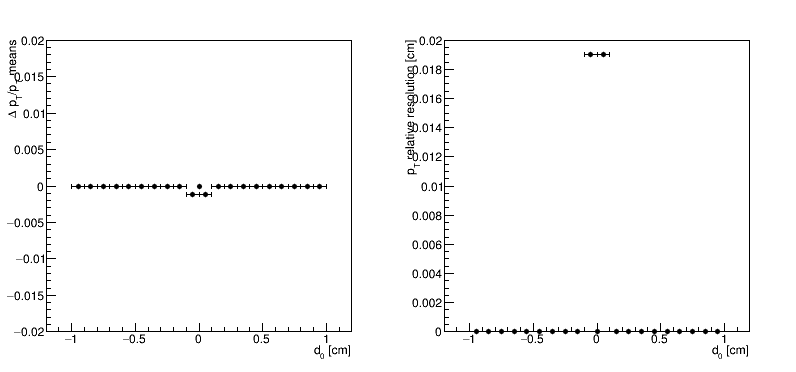

In [1120]:
total_bins_d0 = 200
d0_min = -1.
d0_max = 1.
min_x_d0 = -0.1
max_x_d0 = 0.1
d0_bin_edge = [n/10. for n in range(int(d0_min*10), int(d0_max*10)+1)]


od0 = fit_slices(input_file_name, "deltaPtOverPtVsD0", d0_bin_edge, d0_min, d0_max, total_bins_d0,
                  min_x, max_x, 0., 0.02,
#                  min_x, max_x, 0., 0.1,
                  "d_{0} [cm]", "#Delta p_{T}/p_{T}", "p_{T} relative resolution [cm]")
od0[2]

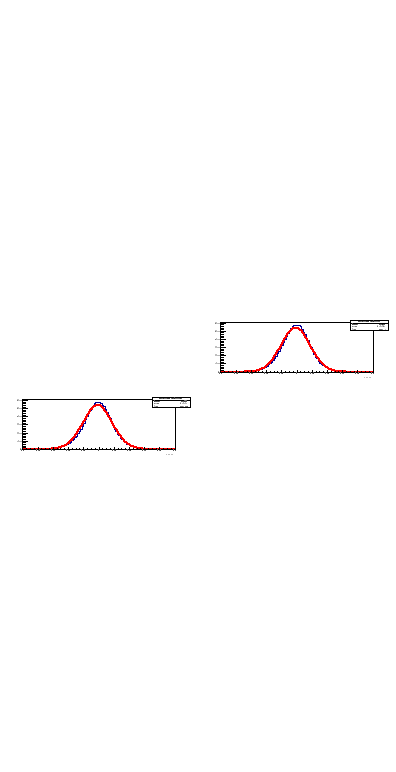

In [1121]:
od0[1]

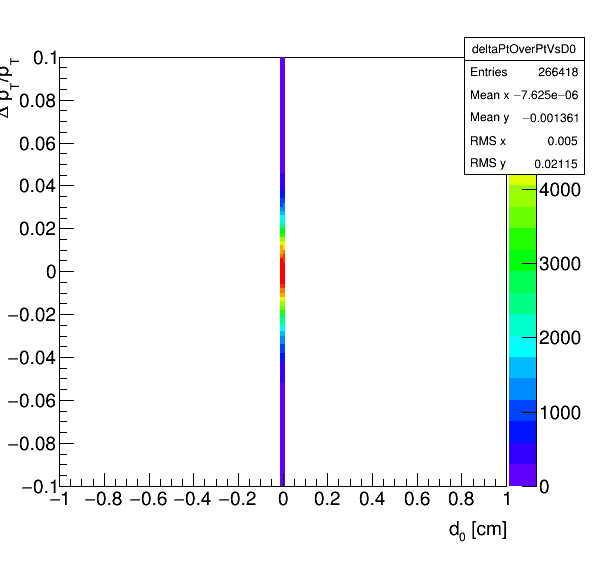

In [1122]:
od0[0]

###$d_{0}$ vs $d_{0}$

In [1123]:
od0 = fit_slices(input_file_name, "deltaD0VsD0", d0_bin_edge, d0_min, d0_max, 200,
                 10*min_x, 10*max_x, 0., 0.1,
#                 10*min_x, 10*max_x, 0., 0.5,
                 "d_{0} [cm]", "#Delta d_{0} [cm]", "d_{0} resolution [cm]")
od0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

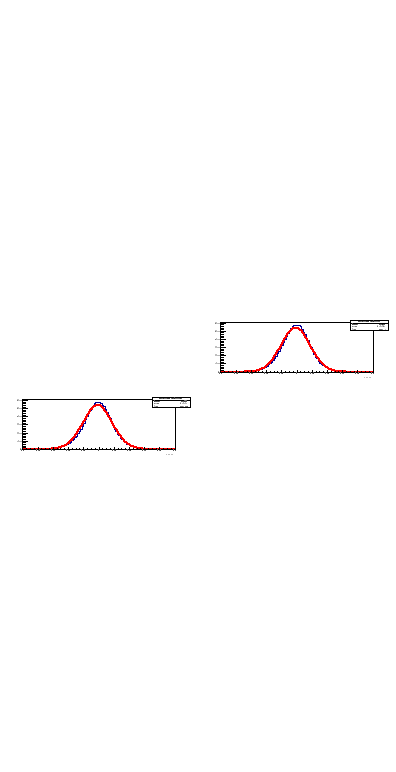

In [1124]:
od0[1]

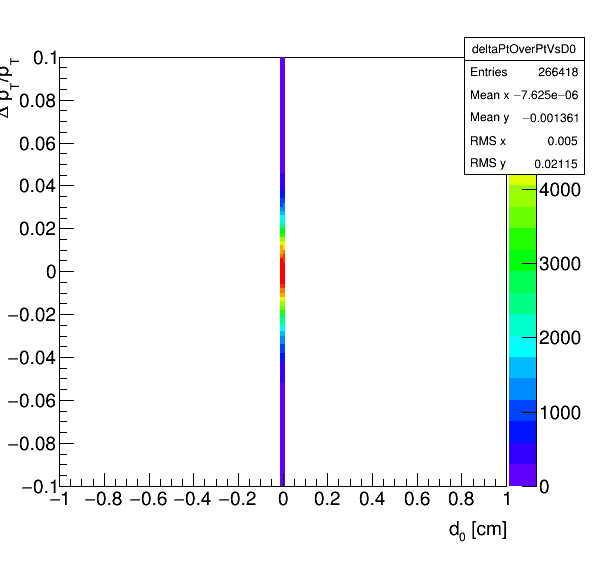

In [1125]:
od0[0]

##$\phi$ Bias and Resolution vs $d_{0}$

In [425]:
ophi = fit_slices(input_file_name, "deltaPhiVsD0", d0_bin_edge, d0_min, d0_max, 200,
#                   min_x_phi, max_x_phi, 0., 0.002,
                   10*min_x_phi, 10*max_x_phi, 0., 0.01,
                  "d_{0} [cm]", "#Delta#phi", "#Delta#phi sigmas")
ophi[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [426]:
ophi[1]

None

In [427]:
ophi[0]

None

##$d_{0}$ Bias and Resolution vs $\phi$

In [428]:
total_bins_phi = 400
# phi_min = 0.
# phi_max = 0.8
phi_min = -3.14
phi_max = 3.14
# phi_bin_edge = [n/100. for n in range(int(phi_min*100), int(phi_max*100)+1)]
phi_bin_edge = [n/10. for n in range(int(phi_min*10), int(phi_max*10)+1)]
od0 = fit_slices(input_file_name, "deltaD0VsPhi", phi_bin_edge, phi_min, phi_max, total_bins_phi,
#                 min_x_phi, max_x_phi, 0., 0.05,
#                  200*min_x_phi, 200*max_x_phi, 0., 0.5,
                  5*min_x_phi, 5*max_x_phi, 0., 0.05,
                 "#phi [rad]", "#Delta d_{0} [cm]", "d_{0} resolution [cm]")
od0[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [429]:
od0[0]

None

$\phi = \phi_0 - \mbox{arcsin}\left(\frac{R}{2\rho}\right)$

$\phi \simeq \phi_0 - \left(\frac{R}{2\rho}\right) - \frac16\left(\frac{R}{2\rho}\right)^3$

$\phi' = \phi + \frac{R - R'}{2\rho} + \frac16\left(\frac{R}{2\rho}\right)^3$

$z \simeq z_{0} + R\cdot\cot\theta + \frac{1}{24}\frac{R^3}{\rho^2}\cot\theta$

$z' = z - \left(R-R' + \frac{1}{24}\frac{R^3}{\rho^2}\right)\cot\theta$

##1/Pz Bias and Resolution

In [430]:
o = fit_slices(input_file_name, "deltaPzOverPzVsPz", pt_bin_edge, pt_min, pt_max, total_bins, min_x, max_x, 0., 0.2,
               "c*p_{z} [GeV/c]", "#Delta p_{z}/p_{z}", "p_{z} resolution / p_{z}")

o[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [431]:
ophi = fit_slices(input_file_name, "deltaPzOverPzVsEta", eta_bin_edge, eta_min, eta_max, 500,
                  min_x, max_x, 0., 0.1,
                  "#eta", "#Deltap_{z}/p_{z}", "p_{z} relative resolution")
ophi[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [432]:
p1 = (0.8011218584666692, 0.7806726011268028, -0.4580003391942949,
      0.8154098095918906, 2.403558021795071, -4.341816039444899)

p2 = (1.094420656412059, -0.0351059779287913, -0.3012850394844819,
      0.3750653855429497, 1.002260424975083, -1.134827247631327)

In [433]:
p11 = (2.577822510655389, -0.5577868766465199, 1.447995502344507,
       0.7093984774699404, -5.985922429037098, 1.808959130735879)
p21 = (0.872190954649759, 0.9063933077180197, 0.2423671747271533,
       -1.039890343856892, -0.2648719674813415, 0.2836447718476091)

In [434]:
for i in range(len(p1)):
    print p1[i]/p11[i]

print ""
    
for i in range(len(p2)):
    print p2[i]/p21[i]

0.310774638345
-1.399589402
-0.316299559255
1.14943834176
-0.401535110134
-2.40017364996

1.25479477926
-0.0387315061021
-1.24309341735
-0.360677823156
-3.78394299142
-4.00087489799


In [435]:
p12 = (3.246354239256722, 1.299425516536766, 0.8657178535810635,
       -6.465286438227688, 0.4838183250371889, 0.5703342836853535)
p22 = (1.980361044721573, -0.5613602632967232, 0.2718933565120522,
       -0.9423104993484825, 0.06693226930136592, 0.1838072320234546)

In [436]:
for i in range(len(p1)):
    print p1[i]/p12[i]

print ""
    
for i in range(len(p2)):
    print p2[i]/p22[i]

0.246775859756
0.600782877658
-0.529041115763
-0.126121219436
4.96789372666
-7.6127565248

0.552636934224
0.0625373404997
-1.10810004095
-0.398027386729
14.9742483773
-6.174007601
